p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No Clinical Benefit v.s. Clinical Benefit: Kruskal-Wallis paired samples, P_val=4.575e-03 stat=8.040e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No Clinical Benefit v.s. Clinical Benefit: Kruskal-Wallis paired samples, P_val=7.389e-03 stat=7.176e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No Clinical Benefit v.s. Clinical Benefit: Kruskal-Wallis paired samples, P_val=5.870e-06 stat=2.053e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No Clinical Benefit v.s. Clin

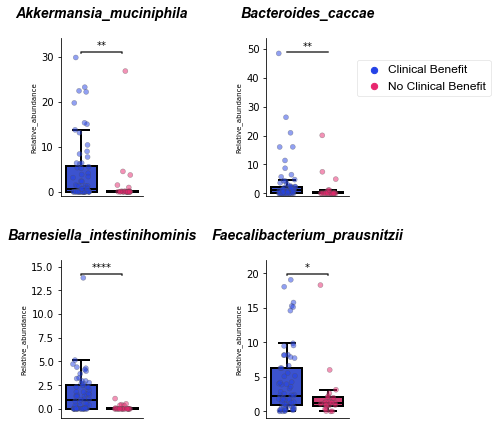

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager
import numpy as np
import seaborn as sns
from statannot import add_stat_annotation

df = pd.read_csv('/Users/jgillece/Desktop/CityOfHope/RenalCell/16088/MetaPhlAn2andLefSe/WithNewData-13Feb2020/merged_abundance_table_species.txt', sep='\t')
df_transposed = df.T.dropna().reset_index()
df_transposed.columns = df_transposed.iloc[0]
df_transposed = df_transposed.reindex(df_transposed.index.drop(0)).reset_index(drop=True)
df_transposed.columns.name = None
df_transposed[['Patient', 'Day']] = df_transposed['Patient_day'].str.split('_', expand=True)
df_melted = pd.melt(df_transposed, id_vars=['ID', 'Patient_day', 'Clinical Benefit', 'Patient', 'Day'], var_name='Species', value_name='Relative_abundance')
df_melted['Clinical Benefit'] = df_melted['Clinical Benefit'].str.replace(r'NCB_PD','No Clinical Benefit')
df_melted['Clinical Benefit'] = df_melted['Clinical Benefit'].str.replace(r'CR_PR_SD','Clinical Benefit')
df_melted['Relative_abundance'] = df_melted['Relative_abundance'].astype('float', errors='raise')

#df_melted.dtypes
barnAndAkker = df_melted.loc[df_melted['Species'].str.contains(r'Barnes|Akker|Bacteroides_caccae|prausnitzii')]
#barnAndAkker.shape

dark_brown = '#2587DE'
dark_pink = '#E73024'
pal = {'No Clinical Benefit': dark_pink, 'Clinical Benefit': dark_brown}
light_pink = '#e8276e'
light_brown = '#2442E7'
face_pal = {'No Clinical Benefit': light_pink, 'Clinical Benefit': light_brown}

hue_order = ['Clinical Benefit', 'No Clinical Benefit']

# Make sure to remove the 'facecolor': 'w' property here, otherwise
# the palette gets overrided
boxprops = {'edgecolor': 'k', 'linewidth': 2}
lineprops = {'color': 'k', 'linewidth': 2}

boxplot_kwargs = {'boxprops': boxprops, 'medianprops': lineprops,
                  'whiskerprops': lineprops, 'capprops': lineprops,
                  'palette': face_pal, 'width': 0.75, 
                  'hue_order': hue_order}

stripplot_kwargs = {'linewidth': 0.5, 'size': 5, 'alpha': 0.5,
                    'palette': face_pal, 'hue_order': hue_order}

# Make the graph 20 inches by 40 inches
plt.figure(figsize=(8, 7))

grouped = barnAndAkker.groupby(['Species'])

# plot numbering starts at 1, not 0
plot_number = 1
for species, selection in grouped:
    # Inside of an image that's a 15x13 grid, put this
    # graph in the in the plot_number slot.
    ax = plt.subplot(2, 2, plot_number)
    sns.boxplot(data=selection, x='Clinical Benefit', y='Relative_abundance', order = ['Clinical Benefit', 'No Clinical Benefit'], ax=ax, showfliers=False, **boxplot_kwargs)
    test_results = add_stat_annotation(ax, data=selection, x='Clinical Benefit', y='Relative_abundance',
                    box_pairs=[('No Clinical Benefit', 'Clinical Benefit')],
                    test='Kruskal', show_test_name=False, text_format='star', loc='inside', verbose=5)
    sns.stripplot(data=selection, x='Clinical Benefit', y='Relative_abundance', ax=ax, hue='Clinical Benefit', order=['Clinical Benefit', 'No Clinical Benefit'], jitter=0.2, dodge=False, **stripplot_kwargs)
    ax.set_title(species, style='italic', fontname='Arial', fontsize=14, fontweight='bold', pad=20)
    plt.rcParams["axes.labelsize"] = 7
    ax.set_xlabel('')
    #ax.set_xlim(-0.5, 1.75)
    ax.grid(False)
    ax.set_xticks([])
    ax.legend_.remove()
    ax.tick_params(left=True, right=False) 
    plt.ylim(-1)
    #ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #handles, labels = ax.get_legend_handles_labels()
    #ax.legend(handles[0:2], labels[0:2], loc='upper right', bbox_to_anchor=(1.5, 0.8), facecolor='white')
    # Go to the next plot for the next loop
    plot_number = plot_number + 1

plt.subplots_adjust(hspace = 0.4, wspace=1.5, left=0.4)
handles, labels = ax.get_legend_handles_labels() 
lgd = ax.legend(handles[0:2], labels[0:2], handletextpad=0.2, bbox_to_anchor=(2.8, 2.3), loc="upper right", prop={'family': 'Arial', 'weight': 'book', "size":12})
lgd.legendHandles[0]._sizes = [40]
lgd.legendHandles[1]._sizes = [40]
lgd.get_frame().set_linewidth(0.5)

#plt.tight_layout()
plt.savefig("/Users/jgillece/Desktop/CityOfHope/RenalCell/16088/MetaPhlAn2andLefSe/WithNewData-13Feb2020/BoxPlots-seaborn.pdf", dpi=300, bbox_inches="tight")

In [30]:
help(plt.savefig)


Help on function savefig in module matplotlib.pyplot:

savefig(*args, **kwargs)
    Save the current figure.
    
    Call signature::
    
      savefig(fname, dpi=None, facecolor='w', edgecolor='w',
              orientation='portrait', papertype=None, format=None,
              transparent=False, bbox_inches=None, pad_inches=0.1,
              frameon=None, metadata=None)
    
    The output formats available depend on the backend being used.
    
    Parameters
    ----------
    
    fname : str or PathLike or file-like object
        A path, or a Python file-like object, or
        possibly some backend-dependent object such as
        `matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is not set, then the output format is inferred from
        the extension of *fname*, if any, and from :rc:`savefig.format`
        otherwise.  If *format* is set, it determines the output format.
    
        Hence, if *fname* is not a path or has no extension, remember to
      

In [37]:
df_transposed['Patient_day'].head()

100_profile    11_42
102_profile     15_0
105_profile     15_8
107_profile     16_0
109_profile    15_15
Name: Patient_day, dtype: object